# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#fereinhit query
temp_units = "imperial"

#API url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q=London"

#test = requests.get(query_url) <--determins if there is a connectio to API

response = requests.get(query_url).json() #saves json file in response variable

#pprint(response) <--reference to see how json file is structured

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=5)
lngs = np.random.uniform(low=-180, high=180, size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

5

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#initialize lists
lats = []
lngs = []
countries = []
cloudiness = []
city_two = []
dates = []
humidity = []
max_temps = []
wind_speeds = []


# initialize counts
counter = 0
set_one = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city.replace(" ","&")).json() #returns json file 
        cloudiness.append(response['clouds']['all']) #return value par
        countries.append(response['sys']['country']) #return value pair for sys dictionary and adds to counties list
        dates.append(response['dt']) #adds date to dates list
        humidity.append(response['main']['humidity']) 
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        #creates counter to display during city calls
        if counter > 48:
            counter = 1
            set_one += 1
            city_two.append(city)
        else:
            counter += 1
            city_two.append(city)

        print(f"Processing Record {counter} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("---------------------------------\nData Retrieval Complete\n---------------------------------")

Beginning Data Retrieval
--------------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
---------------------------------
Data Retrieval Complete
---------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.head()

# output data to csv


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,50,GL,1570046511,77,77.48,-69.36,23.77,4.43
1,camacha,40,PT,1570046772,83,33.08,-16.33,71.60,6.93
2,itoman,20,JP,1570046960,83,26.12,127.67,80.60,5.82
3,arraial do cabo,0,BR,1570046993,38,-22.84,-46.65,95.00,8.05
4,albany,90,US,1570046476,82,42.65,-73.75,64.99,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

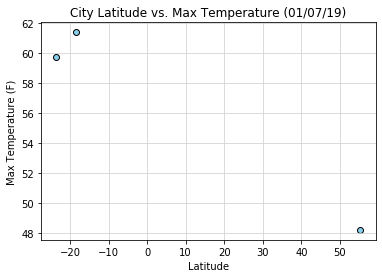

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#save as .png
plt.savefig("Lat_vs_Temp.png") #lat vs temp

#### Latitude vs. Humidity Plot

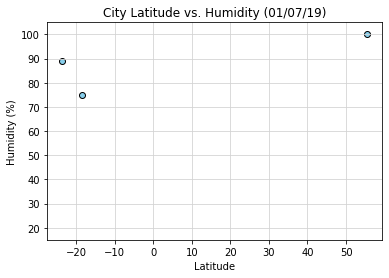

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_Vs_Humid.png")
plt.show() #lat vs humidity

#### Latitude vs. Cloudiness Plot

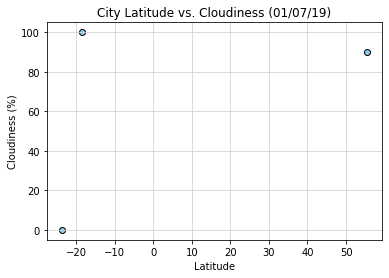

In [27]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_Vs_Cloud.png")
plt.show() #lat vs cloudiness

#### Latitude vs. Wind Speed Plot

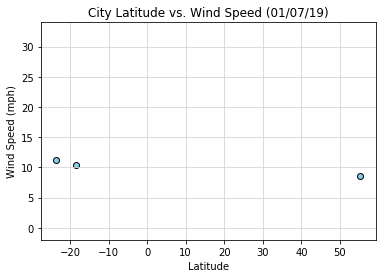

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_vs_Windspeed.png")
plt.show()